# Análise de dados ofensivos NBA 2023-24

## Objetivo do projeto
1. Testar meus conhecimentos em análise de dados utilizando python, sendo o meu primeiro projeto
2. Esse pequeno projeto tem como analisar estatísticas ofensivas e retirar alguns insights para entender melhor o posicionamento que está acontecendo atualmente nos playoffs da NBA

In [7]:
#Importando as bibliotecas necessárias

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Importando o dataset e realizando a limpeza de dados

In [8]:
#Importando o dataset
nba_df = pd.read_csv('/kaggle/input/nba-boxscore-season-2023-2024/NBA-BoxScores-2023-2024.csv', index_col = 0)

#Observando o dataset e as colunas mais interessantes a ser analisadas
display(nba_df.head())

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22300061,1610612747,LAL,Los Angeles,1627752,Taurean Prince,Taurean,F,NaN,29.000000:53,...,1.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,18.0,-14.0
1,22300061,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,29.000000:01,...,1.0,7.0,8.0,5.0,1.0,0.0,0.0,1.0,21.0,7.0
2,22300061,1610612747,LAL,Los Angeles,203076,Anthony Davis,Anthony,C,NaN,34.000000:09,...,1.0,7.0,8.0,4.0,0.0,2.0,2.0,3.0,17.0,-17.0
3,22300061,1610612747,LAL,Los Angeles,1630559,Austin Reaves,Austin,G,NaN,31.000000:20,...,4.0,4.0,8.0,4.0,2.0,0.0,2.0,2.0,14.0,-14.0
4,22300061,1610612747,LAL,Los Angeles,1626156,D'Angelo Russell,D'Angelo,G,NaN,36.000000:11,...,0.0,4.0,4.0,7.0,1.0,0.0,3.0,3.0,11.0,1.0


In [9]:
#Quais campos são nulos e quantos campos estão nulos?
print(nba_df.isnull().sum())

GAME_ID                  0
TEAM_ID                  0
TEAM_ABBREVIATION        0
TEAM_CITY                0
PLAYER_ID                0
PLAYER_NAME              0
NICKNAME                 0
START_POSITION       20088
COMMENT              26401
MIN                   5987
FGM                   5987
FGA                   5987
FG_PCT                5987
FG3M                  5987
FG3A                  5987
FG3_PCT               5987
FTM                   5987
FTA                   5987
FT_PCT                5987
OREB                  5987
DREB                  5987
REB                   5987
AST                   5987
STL                   5987
BLK                   5987
TO                    5987
PF                    5987
PTS                   5987
PLUS_MINUS            5987
dtype: int64


### Percebendo que os valores nulos nos fundamentos do jogo seria por conta de jogadores que não jogaram


In [10]:
#Pegando o nome das colunas do dataset
print(nba_df.columns)

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')


In [11]:
#Removendo as colunas com valores nulos que não fazem parte dos fundamentos
nba_df.drop(['START_POSITION', 'COMMENT'], axis = 1, inplace = True)
nba_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22300061,1610612747,LAL,Los Angeles,1627752,Taurean Prince,Taurean,29.000000:53,6.0,8.0,...,1.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,18.0,-14.0
1,22300061,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,29.000000:01,10.0,16.0,...,1.0,7.0,8.0,5.0,1.0,0.0,0.0,1.0,21.0,7.0
2,22300061,1610612747,LAL,Los Angeles,203076,Anthony Davis,Anthony,34.000000:09,6.0,17.0,...,1.0,7.0,8.0,4.0,0.0,2.0,2.0,3.0,17.0,-17.0
3,22300061,1610612747,LAL,Los Angeles,1630559,Austin Reaves,Austin,31.000000:20,4.0,11.0,...,4.0,4.0,8.0,4.0,2.0,0.0,2.0,2.0,14.0,-14.0
4,22300061,1610612747,LAL,Los Angeles,1626156,D'Angelo Russell,D'Angelo,36.000000:11,4.0,12.0,...,0.0,4.0,4.0,7.0,1.0,0.0,3.0,3.0,11.0,1.0


In [12]:
#Removendo as linhas com valores nulos
nba_df.dropna(axis = 0, inplace = True)
nba_df.isnull().sum()

GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

# Análise das estatísticas ofensivas
### Separando os Top 10 de pontuadores, assistências e reboteiros

,PLAYER_NAME,PTS
TEAM_ABBREVIATION,,
DAL,Luka Doncic,2370.0
OKC,Shai Gilgeous-Alexander,2254.0
MIL,Giannis Antetokounmpo,2222.0
NYK,Jalen Brunson,2212.0
DEN,Nikola Jokic,2085.0
MIN,Anthony Edwards,2049.0
PHX,Kevin Durant,2032.0
BOS,Jayson Tatum,1987.0
SAC,De'Aaron Fox,1966.0


<Axes: title={'center': 'Top 10 pontuadores da temporada regular'}, xlabel='PTS', ylabel='PLAYER_NAME'>

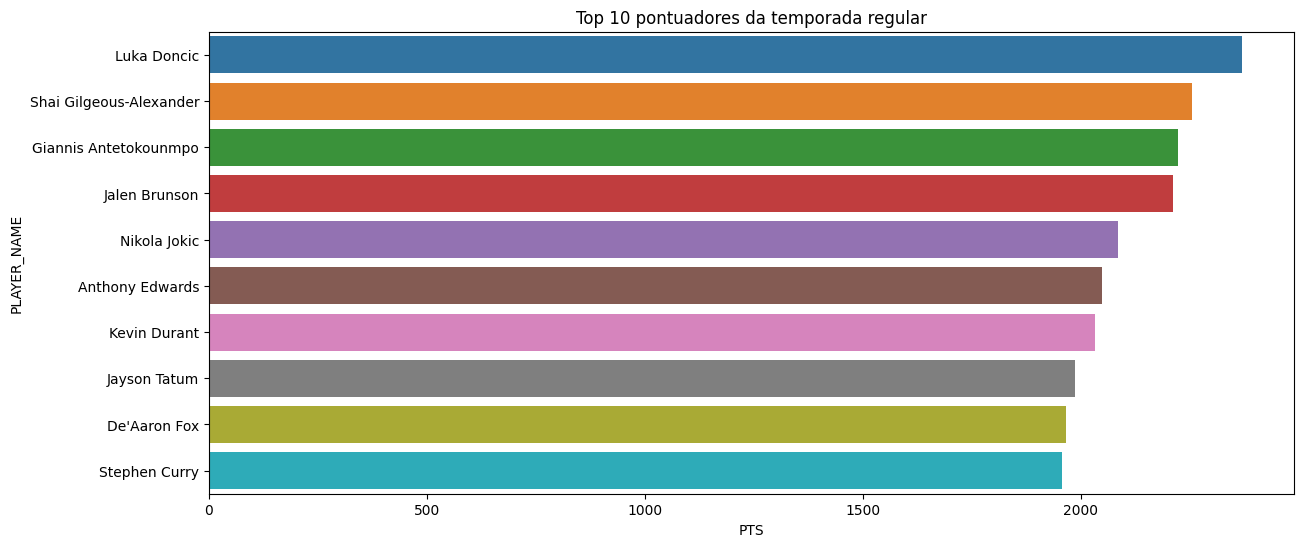

In [13]:
#Top 10 pontuadores
top10_pontuadores = nba_df.groupby(['TEAM_ABBREVIATION', 'PLAYER_NAME']).PTS.sum().sort_values(ascending = False).nlargest(10)
top10_pontuadores = pd.DataFrame(top10_pontuadores).reset_index().set_index('TEAM_ABBREVIATION')
display(top10_pontuadores)

#Plotando o gráfico
plt.figure(figsize = (14,6))
plt.title('Top 10 pontuadores da temporada regular')
sns.barplot(x = top10_pontuadores['PTS'], y = top10_pontuadores['PLAYER_NAME'])

,PLAYER_NAME,AST
TEAM_ABBREVIATION,,
IND,Tyrese Haliburton,752.0
DEN,Nikola Jokic,708.0
DAL,Luka Doncic,686.0
SAC,Domantas Sabonis,673.0
LAC,James Harden,614.0
LAL,LeBron James,589.0
HOU,Fred VanVleet,589.0
ATL,Trae Young,583.0
NYK,Jalen Brunson,519.0


<Axes: title={'center': 'Top 10 passadores da temporada regular'}, xlabel='AST', ylabel='PLAYER_NAME'>

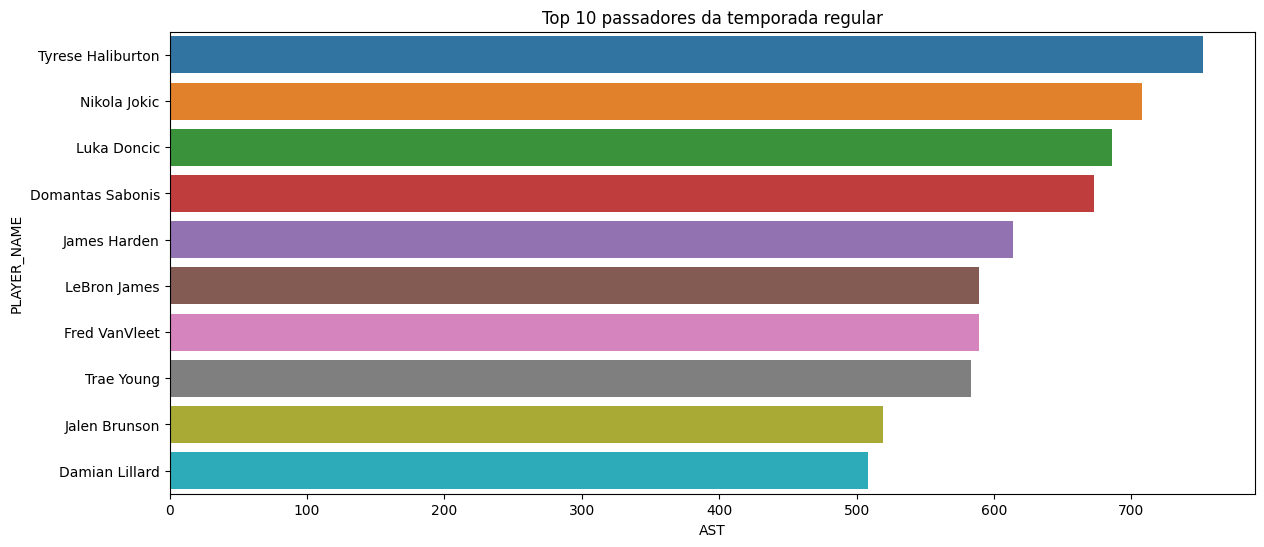

In [14]:
#Top 10 pontuadores
top10_assist = nba_df.groupby(['TEAM_ABBREVIATION', 'PLAYER_NAME']).AST.sum().sort_values(ascending = False).nlargest(10)
top10_assist = pd.DataFrame(top10_assist).reset_index().set_index('TEAM_ABBREVIATION')
display(top10_assist)

#Plotando o gráfico
plt.figure(figsize = (14,6))
plt.title('Top 10 passadores da temporada regular')
sns.barplot(x = top10_assist['AST'], y = top10_assist['PLAYER_NAME'])

,PLAYER_NAME,REB
TEAM_ABBREVIATION,,
SAC,Domantas Sabonis,1120.0
MIN,Rudy Gobert,982.0
DEN,Nikola Jokic,976.0
LAL,Anthony Davis,961.0
MIL,Giannis Antetokounmpo,841.0
PHX,Jusuf Nurkic,837.0
CLE,Jarrett Allen,811.0
CHI,Nikola Vucevic,801.0
ATL,Clint Capela,776.0


<Axes: title={'center': 'Top 10 reboteiro da temporada regular'}, xlabel='REB', ylabel='PLAYER_NAME'>

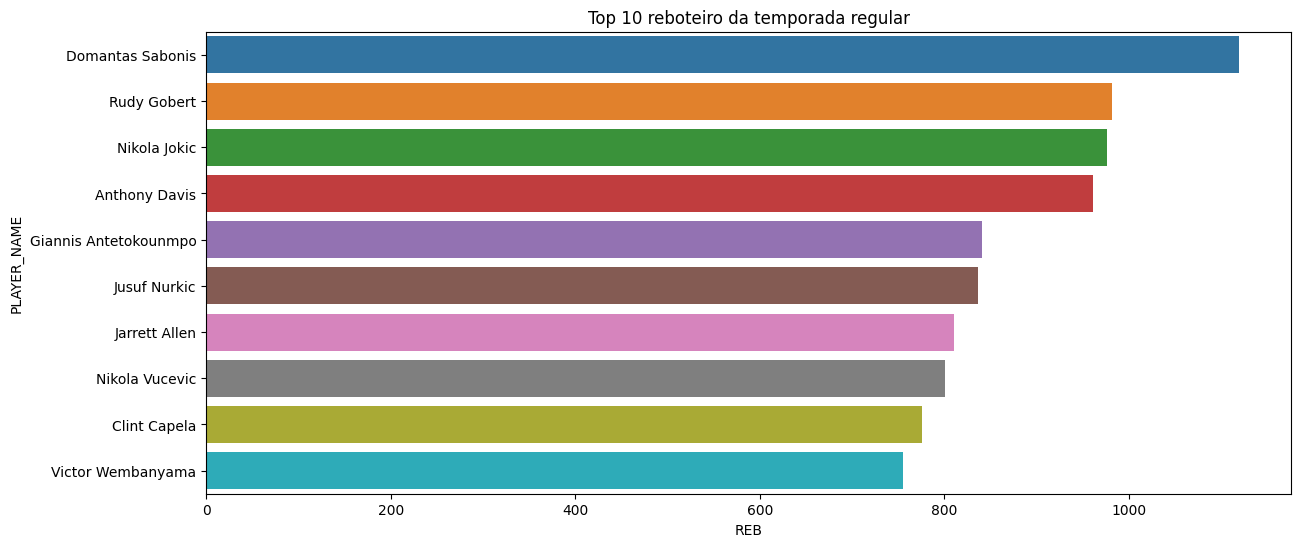

In [15]:
#Top 10 reboteiros
top10_reboteiro = nba_df.groupby(['TEAM_ABBREVIATION', 'PLAYER_NAME']).REB.sum().sort_values(ascending = False).nlargest(10)
top10_reboteiro = pd.DataFrame(top10_reboteiro).reset_index().set_index('TEAM_ABBREVIATION')
display(top10_reboteiro)

#Plotando o gráfico
plt.figure(figsize = (14,6))
plt.title('Top 10 reboteiro da temporada regular')
sns.barplot(x = top10_reboteiro['REB'], y = top10_reboteiro['PLAYER_NAME'])

### Top 5 das equipes em estatísticas ofensivas

In [16]:
#Separando o top 5 das equipes com melhores desempenhos em pontos assistências e rebotes
offensive_stats_team = nba_df.groupby(['TEAM_ABBREVIATION']).agg({'PTS' : 'sum', 'OREB' : 'sum', 'AST' : 'sum'})

teams = nba_df['TEAM_ABBREVIATION'].unique()

#Pegar as estatísticas ofensivas de cada time
all_teams_offensive = [offensive_stats_team.loc[team] for team in teams]
all_teams_offensive = pd.DataFrame(all_teams_offensive)
display(all_teams_offensive)

,PTS,OREB,AST
LAL,9679.0,676.0,2339.0
DEN,9418.0,881.0,2415.0
PHX,9532.0,831.0,2218.0
GSW,9657.0,996.0,2402.0
POR,8722.0,1036.0,1894.0
LAC,9481.0,822.0,2097.0
DAL,9664.0,797.0,2106.0
SAS,9192.0,849.0,2449.0
SAC,9558.0,888.0,2324.0
UTA,9484.0,1002.0,2232.0


<Axes: >

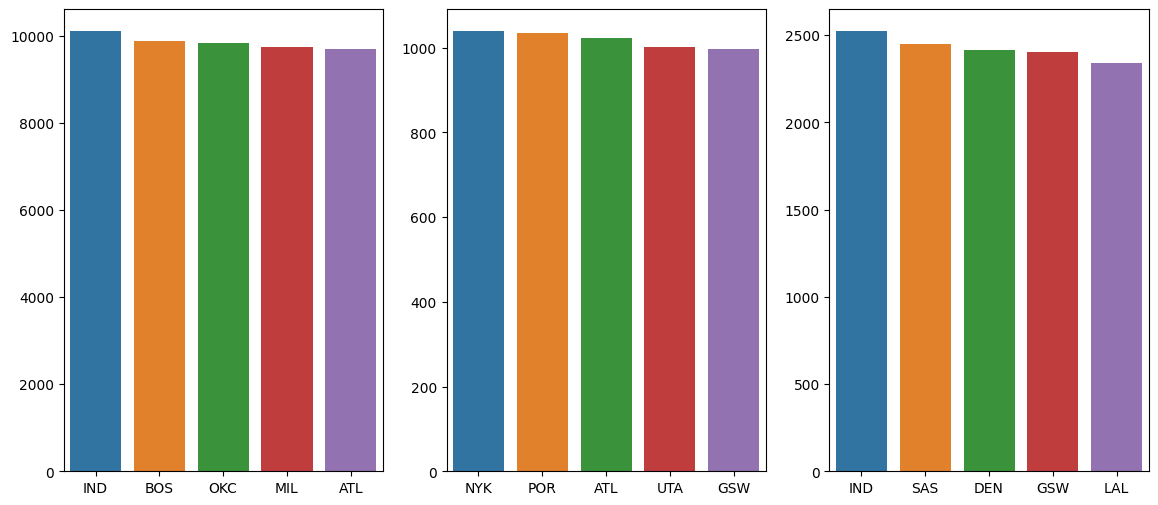

In [17]:
#Mostrando o top 5 de pontos, rebotes e assistências
plt.figure(figsize = (14,6))

top5_pontos = all_teams_offensive['PTS'].sort_values(ascending = False).nlargest(5)
plt.subplot(1,3,1)
sns.barplot(x = top5_pontos.index, y = top5_pontos.values)

top5_rebotes = all_teams_offensive['OREB'].sort_values(ascending = False).nlargest(5)
plt.subplot(1,3,2)
sns.barplot(x = top5_rebotes.index, y = top5_rebotes.values)

top5_assist = all_teams_offensive['AST'].sort_values(ascending = False).nlargest(5)
plt.subplot(1,3,3)
sns.barplot(x = top5_assist.index, y = top5_assist.values)

# Análise das estatísticas defensivas
### Top 10 de tocos, roubos de bola e rebotes defensivos

,PLAYER_NAME,BLK
TEAM_ABBREVIATION,,
SAS,Victor Wembanyama,254.0
OKC,Chet Holmgren,190.0
MIL,Brook Lopez,189.0
LAL,Anthony Davis,178.0
MIN,Rudy Gobert,162.0
UTA,Walker Kessler,154.0
BKN,Nic Claxton,146.0
IND,Myles Turner,144.0
BOS,Kristaps Porzingis,111.0


<Axes: xlabel='BLK', ylabel='PLAYER_NAME'>

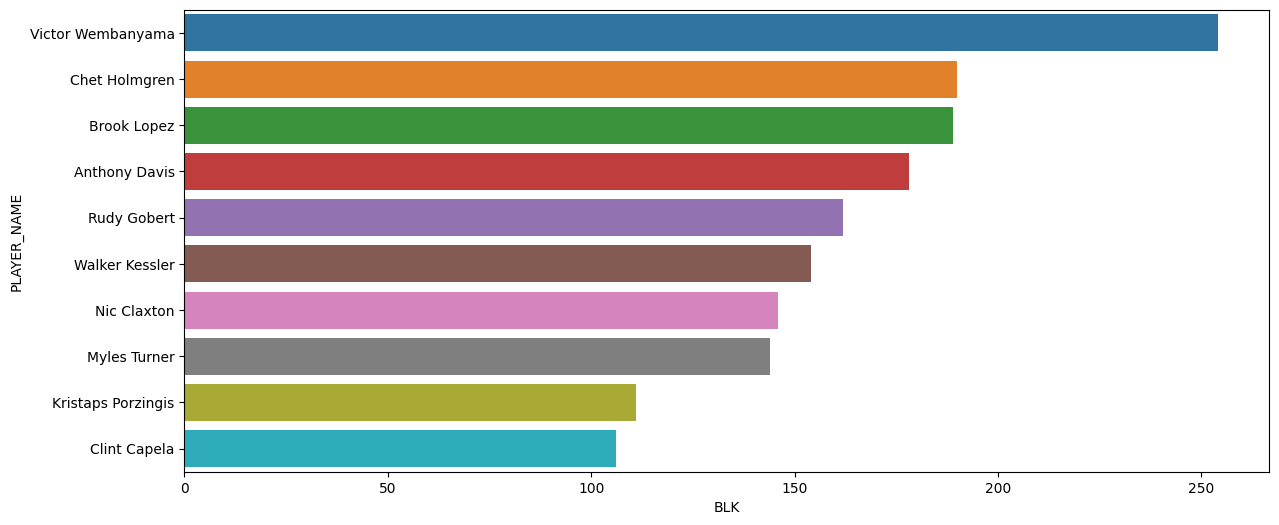

In [18]:
#Top 10 tocos
top10_tocos = nba_df.groupby(['TEAM_ABBREVIATION','PLAYER_NAME'])['BLK'].sum().sort_values(ascending = False).nlargest(10)
top10_tocos = top10_tocos.reset_index().set_index('TEAM_ABBREVIATION')
display(top10_tocos)

plt.figure(figsize = (14,6))
sns.barplot(x = top10_tocos['BLK'], y = top10_tocos['PLAYER_NAME'])

,PLAYER_NAME,STL
TEAM_ABBREVIATION,,
OKC,Shai Gilgeous-Alexander,150.0
SAC,De'Aaron Fox,150.0
CHI,Alex Caruso,120.0
LAC,Paul George,113.0
POR,Matisse Thybulle,113.0
ATL,Dejounte Murray,111.0
LAC,Kawhi Leonard,111.0
DEN,Nikola Jokic,108.0
NYK,Donte DiVincenzo,107.0


<Axes: xlabel='STL', ylabel='PLAYER_NAME'>

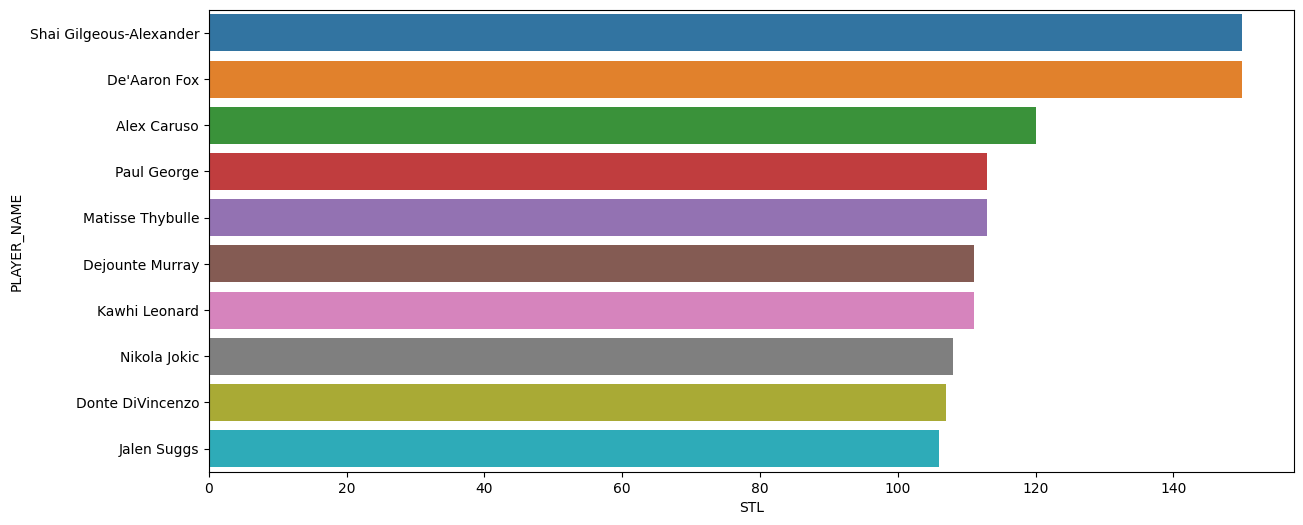

In [19]:
#Top 10 roubos de bola
top10_roubos = nba_df.groupby(['TEAM_ABBREVIATION', 'PLAYER_NAME'])['STL'].sum().sort_values(ascending = False).nlargest(10)
top10_roubos = pd.DataFrame(top10_roubos).reset_index().set_index('TEAM_ABBREVIATION')
display(top10_roubos)


plt.figure(figsize = (14,6))
sns.barplot(x = top10_roubos['STL'], y = top10_roubos['PLAYER_NAME'])

,PLAYER_NAME,DREB
TEAM_ABBREVIATION,,
SAC,Domantas Sabonis,826.0
DEN,Nikola Jokic,753.0
LAL,Anthony Davis,722.0
MIN,Rudy Gobert,697.0
MIL,Giannis Antetokounmpo,645.0
PHX,Jusuf Nurkic,613.0
SAS,Victor Wembanyama,594.0
CHI,Nikola Vucevic,591.0
DAL,Luka Doncic,588.0


<Axes: xlabel='DREB', ylabel='PLAYER_NAME'>

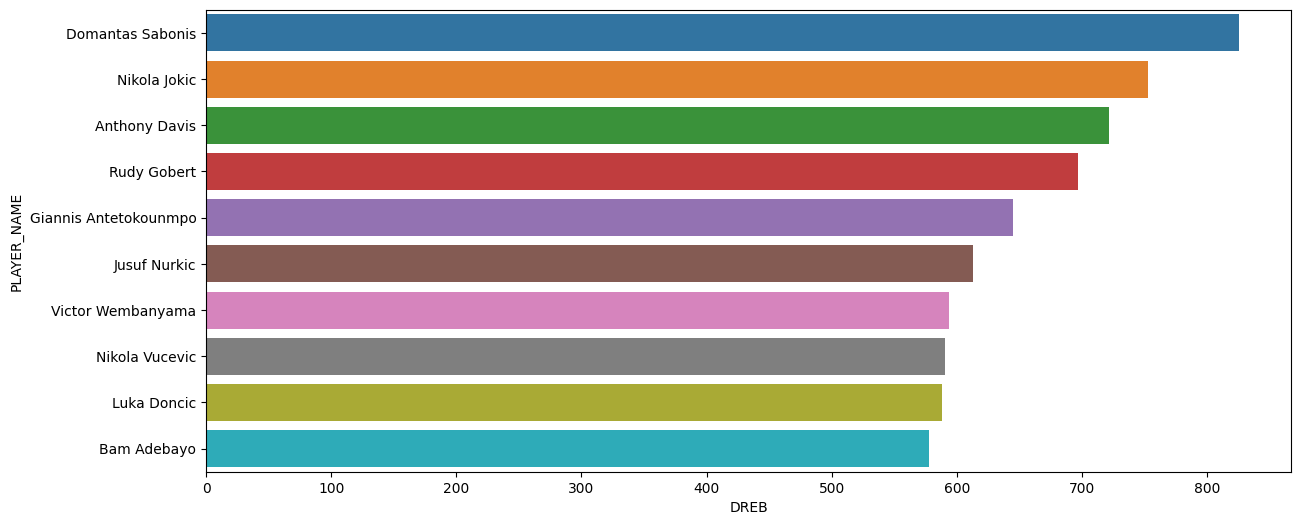

In [20]:
#Top 10 rebotes defensivos
top10_dReb = nba_df.groupby(['TEAM_ABBREVIATION', 'PLAYER_NAME'])['DREB'].sum().sort_values(ascending = False).nlargest(10)
top10_dReb = pd.DataFrame(top10_dReb).reset_index().set_index('TEAM_ABBREVIATION')
display(top10_dReb)


plt.figure(figsize = (14,6))
sns.barplot(x = top10_dReb['DREB'], y = top10_dReb['PLAYER_NAME'])

In [21]:
#Criando um Dataframe das equipes com estatísticas de defesa
defensive_stats_teams = nba_df.groupby(['TEAM_ABBREVIATION']).agg({'BLK' : 'sum', 'STL' : 'sum', 'DREB' : 'sum'})

all_teams_defensive = [defensive_stats_teams.loc[team] for team in teams]
all_teams_defensive = pd.DataFrame(all_teams_defensive)
display(all_teams_defensive)
'''for def_stats in defensive_stats:
    print('Top 5 {}\n'.format(def_stats), all_teams_defensive[def_stats].sort_values(ascending = False).nlargest(5), '\n')'''

,BLK,STL,DREB
LAL,453.0,605.0,2859.0
DEN,456.0,585.0,2762.0
PHX,492.0,610.0,2783.0
GSW,377.0,572.0,2834.0
POR,354.0,627.0,2469.0
LAC,413.0,640.0,2701.0
DAL,406.0,563.0,2724.0
SAS,520.0,584.0,2778.0
SAC,342.0,625.0,2719.0
UTA,458.0,537.0,2725.0


"for def_stats in defensive_stats:\n    print('Top 5 {}\n'.format(def_stats), all_teams_defensive[def_stats].sort_values(ascending = False).nlargest(5), '\n')"

<Axes: title={'center': 'Top 5 rebotes defensivos'}>

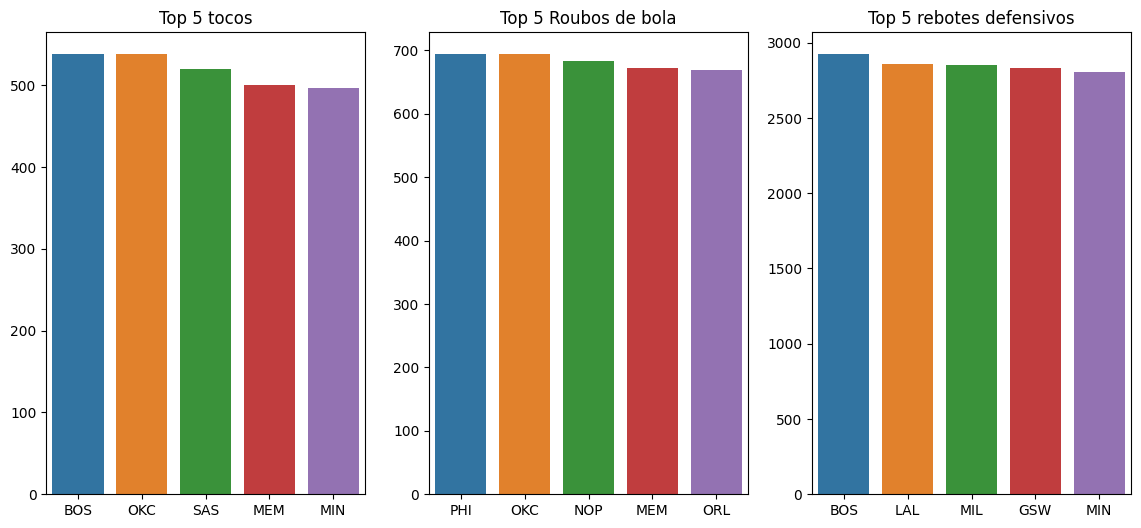

In [22]:
#Definindo o tamanho da figura
plt.figure(figsize = (14,6))

#Top 5 times em tocos
top5_tocos = all_teams_defensive['BLK'].sort_values(ascending = False).nlargest(5)
plt.subplot(1,3,1)
plt.title('Top 5 tocos')
sns.barplot(x = top5_tocos.index, y = top5_tocos.values)

#Top 5 times em roubos de bola
top5_roubos = all_teams_defensive['STL'].sort_values(ascending = False).nlargest(5)
plt.subplot(1,3,2)
plt.title('Top 5 Roubos de bola')
sns.barplot(x = top5_roubos.index, y = top5_roubos.values)

#Top 5 times em rebotes defensivos
top5_dReb = all_teams_defensive['DREB'].sort_values(ascending = False).nlargest(5)
plt.subplot(1,3,3)
plt.title('Top 5 rebotes defensivos')
sns.barplot(x = top5_dReb.index, y = top5_dReb.values)

# Insights e conclusões
1. Pacers foi o time mais agressivo da temporada, sendo o top 1 em pontos e assistências. Porém, apenas um atleta está no top 10 (Tyrese Haliburton), ou seja, o time foi bem equilibrado e possui uma distribuição entres os atletas.
2. Celtics veio para a pós-temporada com um time bem forte, já que está no Top 5 em pontos, rebotes defensivos e tocos.
3. Timberwolves com um time bem focado em defesa, marcando presença no Top 5 de tocos e rebotes defensivos.
4. Thunder com o time mais jovem da NBA e possuindo uma das melhores estratégias já que possui boas posições em estatísticas ofensivas e defensivas.
5. Suns foi um time que investiram muito pesado na pré-temporada, porém não teve um bom aproveitamento durante a temporado e muito menos nos playoffs.